In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Table of Contents <a id="toc"></a>
1. [Datasets](#datasets)
2. [Reading, analyzing the datasets](#reading)
   - [2.1. Reading data](#2-1)
   - [2.2. Database Fields Description](#2-2)
   - [2.3. Dataset cleaning](#2-3)
     - [2.3.1. Columns overview](#2-3-1)
	 - [2.3.2. Change column names](#2-3-2)
	 - [2.3.3. Data types](#2-3-3)
	 - [2.3.4. Convert date to datetime](#2-3-4)
	 - [2.3.5. Unique values, nan values](#2-3-5)
	 - [2.3.6. Column analysis](#2-3-6)
3. [Analyzes, visualizations](#visualizations)
   - [3.1. Years with the most accidents](#3-1)
   - [3.2. Ten countries with the most accidents](#3-2)
   - [3.3. Ten countries with the most accidents](#3-3)
   - [3.4. Ten most dangerous aircrafts](#3-4)
   - [3.5. Ten operators with most accidents](#3-5)
   - [3.6. Most dangerous flight phases](#3-6)
   - [3.7. Most common crash cause](#3-7)
   - [3.8. Correlation between year, passengers, crew, fatalities](#3-8)
   - [3.9. Relationship between year, flight phase, total fatalities](#3-9)
   - [3.10. Relationship between year, survivors, total fatalities](#3-10)
   - [3.11. Relationship between year, crash site, total fatalities](#3-11)

<div style="background-color: #9df9ef; padding: 10px;"></div>

# Aviation accidents analysis

In this project we will analyze the reasons why accidents happen in aviation.
An aviation accident is an incident in which an aircraft is damaged or destroyed as a result of a collision, fire, structural failure, or other event. Aviation accidents can be caused by a variety of factors, including mechanical failure, pilot error, adverse weather conditions, and sabotage. Aviation accidents can result in fatalities, injuries, and damage to property.

## I. Datasets <a id="datasets"></a> 

We'll use 2 datasets from Kaggle:
### Dataset 1. Historical Plane Crash Data
This dataset contains all of the plane crashes that happened throughout history. Data are extracted using web scraping methods in R and preprocessed to create an organized and informative dataset.
All data are collected from Ronan Hubert: [Aviation Accident Bureau Archive]
(https://www.baaa-acro.com/)
This is the dataset [here]:(https://www.kaggle.com/datasets/abeperez/historical-plane-crash-data)

### Dataset 2. Aviation Accident Database & Synopses, up to 2023

The dataset is [here](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses)
The NTSB aviation accident database [here](https://www.ntsb.gov/Pages/home.aspx) contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters.

[Return to Table of Contents](#toc)

<div style="background-color: #9df9ef; padding: 10px;"></div>

## II. Reading, analyzing the datasets <a id="reading"></a>

#### Dataset 1 - Historical Plane Crash Data 
This dataset contains all of the plane crashes that happened throughout history. Data are extracted using web scraping methods in R and preprocessed to create an organized and informative dataset.
All data are collected from Ronan Hubert: [Aviation Accident Bureau Archive]
(https://www.baaa-acro.com/)
This is the dataset [here]:(https://www.kaggle.com/datasets/abeperez/historical-plane-crash-data)

[Return to Table of Contents](#toc)

<div style="background-color: #9df9ef; padding: 10px;"></div>

### 2.1. Reading data <a id="2-1">

In [2]:
avioset_aab = pd.read_csv('data/dataset_1_accident_bureau/Plane Crashes.csv')

In [3]:
# 28536 rows × 24 columns
print(avioset_aab.shape)
avioset_aab.head()

(28536, 24)


,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,...,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown


[Return to Table of Contents](#toc)

<div style="background-color: #9df9ef; padding: 10px;"></div>

### 2.2. Database Fields Description <a id="2-2">

In [4]:
dataColumnsMeaning = pd.read_csv('data/dataset_1_accident_bureau/AAB_DB_Fields_Description.csv', encoding='utf-8')

In [5]:
dataColumnsMeaning.columns

Index(['Field name', 'Description'], dtype='object')

In [6]:
dataColumnsMeaning.shape

(24, 2)

In [7]:
dataColumnsMeaning.style.set_properties(**{'text-align': 'left'})

,Field name,Description
0,date,Date of accident
1,time,Time of accident
2,aircraft,Manufacturer and exact model involved in the accident
3,operator,"The company, organisation or individual operating the aircraft at the time of the accident"
4,registration,The registrationmark applied on the the aircaft at the time of the accident
5,flight_phase,Phase of flight
6,flight_type,"Flight types refer to the various classifications of flights based on their purpose, nature, or the kind of aircraft operation being conducted"
7,survivors,Number of survivors
8,crash_site,Crash site
9,schedule,Schedule


[Return to Table of Contents](#toc)

<div style="background-color: #9df9ef; padding: 10px;"></div>

### 2.3. Dataset cleaning <a id="2-3">

#### 2.3.1. Columns overview <a id="2-3-1">
Let's see what data do we have in all columns. 

In [8]:
avioset_aab.columns

Index(['Date', 'Time', 'Aircraft', 'Operator', 'Registration', 'Flight phase',
       'Flight type', 'Survivors', 'Crash site', 'Schedule', 'MSN', 'YOM',
       'Flight no.', 'Crash location', 'Country', 'Region', 'Crew on board',
       'Crew fatalities', 'Pax on board', 'PAX fatalities', 'Other fatalities',
       'Total fatalities', 'Circumstances', 'Crash cause'],
      dtype='object')

[Return to Table of Contents](#toc)

<div style="background-color: #9df9ef; padding: 10px;"></div>

#### 2.3.2. Change column names <a id="2-3-2">
Let's make our column names more Pythonic, which means changing names like Event.Id to event_id.

In [9]:
# We will make a new dataset so as not to lose the original
avioset_aab_low = avioset_aab.copy()

In [10]:
def change_col_names(df, old_symbol, new_symbol):
    df.columns = df.columns.str.lower().str.replace(old_symbol, new_symbol)
    return df

In [11]:
# Changing column names to pythonic
change_col_names(avioset_aab_low, ' ', '_')

# Changing "flight_no." to "flight_no"
avioset_aab_low.rename(columns={'flight_no.': 'flight_no'}, inplace=True)

# Test after the change
avioset_aab_low.columns

Index(['date', 'time', 'aircraft', 'operator', 'registration', 'flight_phase',
       'flight_type', 'survivors', 'crash_site', 'schedule', 'msn', 'yom',
       'flight_no', 'crash_location', 'country', 'region', 'crew_on_board',
       'crew_fatalities', 'pax_on_board', 'pax_fatalities', 'other_fatalities',
       'total_fatalities', 'circumstances', 'crash_cause'],
      dtype='object')

[Return to Table of Contents](#toc)

<div style="background-color: #9df9ef; padding: 10px;"></div>

#### 2.3.3. Data types <a id="2-3-3">

In [12]:
# let's check dtypes
avioset_aab_low.dtypes

date                 object
time                 object
aircraft             object
operator             object
registration         object
flight_phase         object
flight_type          object
survivors            object
crash_site           object
schedule             object
msn                  object
yom                 float64
flight_no           float64
crash_location       object
country              object
region               object
crew_on_board       float64
crew_fatalities     float64
pax_on_board        float64
pax_fatalities      float64
other_fatalities    float64
total_fatalities      int64
circumstances        object
crash_cause          object
dtype: object

[Return to Table of Contents](#toc)

<div style="background-color: #9df9ef; padding: 10px;"></div>

#### 2.3.4. Convert date to datetime <a id="2-3-4">
- We'll convert date to datetime.
- We'll add 3 new columns 'year', 'month', 'day'.
- We'll delete the 'date' column because we don't need it anymore.

In [13]:
avioset_aab_low.date.unique

<bound method Series.unique of 0        1918-05-02
1        1918-06-08
2        1918-06-11
3        1918-06-19
4        1918-06-24
            ...    
28531    2022-05-20
28532    2022-05-23
28533    2022-05-24
28534    2022-05-29
28535    2022-06-03
Name: date, Length: 28536, dtype: object>

In [14]:
avioset_aab_low['date'] = pd.to_datetime(avioset_aab_low['date'])

In [15]:
avioset_aab_low.date.unique

<bound method Series.unique of 0       1918-05-02
1       1918-06-08
2       1918-06-11
3       1918-06-19
4       1918-06-24
           ...    
28531   2022-05-20
28532   2022-05-23
28533   2022-05-24
28534   2022-05-29
28535   2022-06-03
Name: date, Length: 28536, dtype: datetime64[ns]>

In [16]:
# Let's add column year
avioset_aab_low['year'] = pd.DatetimeIndex(avioset_aab_low['date']).year

In [17]:
# Let's add column month
avioset_aab_low['month'] = pd.DatetimeIndex(avioset_aab_low['date']).month

In [18]:
# Let's add column day
avioset_aab_low['day'] = pd.DatetimeIndex(avioset_aab_low['date']).day

In [19]:
avioset_aab_low['year'].unique()

array([1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928,
       1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022])

In [20]:
avioset_aab_low['month'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4])

In [21]:
avioset_aab_low['day'].unique()

array([ 2,  8, 11, 19, 24, 14, 18, 23, 26, 13,  6, 27,  9, 12, 20, 16, 21,
       22, 31, 10,  7, 15,  1,  3,  4, 17, 25, 29,  5, 28, 30])

In [22]:
avioset_aab_low = avioset_aab_low.drop('date', axis=1)

In [23]:
# Check after all these transformations
avioset_aab_low.columns

Index(['time', 'aircraft', 'operator', 'registration', 'flight_phase',
       'flight_type', 'survivors', 'crash_site', 'schedule', 'msn', 'yom',
       'flight_no', 'crash_location', 'country', 'region', 'crew_on_board',
       'crew_fatalities', 'pax_on_board', 'pax_fatalities', 'other_fatalities',
       'total_fatalities', 'circumstances', 'crash_cause', 'year', 'month',
       'day'],
      dtype='object')

[Return to Table of Contents](#toc)

<div style="background-color: #9df9ef; padding: 10px;"></div>

#### 2.3.5. Unique values, nan values <a id="2-3-5">
Let's look at the unique values and nan values in each column and decide which columns to use for our further analysis.

In [24]:
# View unique values for all columns
def all_columns_unique_values(df):
    for col in df.columns:
        print(f"Unique values in column \'{col}\': \n {df[col].unique()}\n\n **************** \n")

all_columns_unique_values(avioset_aab_low)

Unique values in column 'time': 
 [nan '15H 15M 0S' '12H 0M 0S' ... '3H 21M 0S' '2H 53M 0S' '13H 33M 0S']

 **************** 

Unique values in column 'aircraft': 
 ['De Havilland DH.4' 'Handley Page V/1500' 'Avro 504' ...
 'Cirrus Vision SF50' 'Socata TBM-910' 'Learjet 75']

 **************** 

Unique values in column 'operator': 
 ['United States Signal Corps - USSC' 'Handley Page Aircraft Company Ltd'
 'Royal Air Force - RAF' ... 'Raul Ignacion Posada'
 'Yakutat Coastal Airlines' 'GoJump Oceanside']

 **************** 

Unique values in column 'registration': 
 ['AS-32084' 'E4104' 'A8544' ... 'N703TH' '9N-AET' 'N7581F']

 **************** 

Unique values in column 'flight_phase': 
 ['Takeoff (climb)' 'Flight' 'Landing (descent or approach)' nan 'Taxiing'
 'Parking']

 **************** 

Unique values in column 'flight_type': 
 ['Test' 'Training' 'Military' 'Delivery'
 'Survey / Patrol / Reconnaissance' 'Postal (mail)' 'Ferry'
 'Aerial photography' 'Scheduled Revenue Flight' 'Governm

In [25]:
# View NAN values in all columns
def all_columns_nan_values(df):
    for col in df.columns:
        print(f"All nan values in column \'{col}\': \n {df[col].isna().sum()}\n\n **************** \n")

all_columns_nan_values(avioset_aab_low)

All nan values in column 'time': 
 14587

 **************** 

All nan values in column 'aircraft': 
 1

 **************** 

All nan values in column 'operator': 
 0

 **************** 

All nan values in column 'registration': 
 815

 **************** 

All nan values in column 'flight_phase': 
 638

 **************** 

All nan values in column 'flight_type': 
 57

 **************** 

All nan values in column 'survivors': 
 1297

 **************** 

All nan values in column 'crash_site': 
 383

 **************** 

All nan values in column 'schedule': 
 8946

 **************** 

All nan values in column 'msn': 
 4182

 **************** 

All nan values in column 'yom': 
 5311

 **************** 

All nan values in column 'flight_no': 
 28536

 **************** 

All nan values in column 'crash_location': 
 12

 **************** 

All nan values in column 'country': 
 1

 **************** 

All nan values in column 'region': 
 1

 **************** 

All nan values in column 'crew_on_boar

[Return to Table of Contents](#toc)

<div style="background-color: #9df9ef; padding: 10px;"></div>

#### 2.3.6. Column analysis <a id="2-3-6">
We'll make a deep copy of our dataset into new one and will clean or change some data.

In [26]:
avioset = avioset_aab_low.copy()

<div style="background-color: #9df9ef; padding: 10px;"></div>

##### Column 'time' has 14587 nan values from 28536 which is more than 51% of all our data. That's why we'll delete it.

In [27]:
# Drop a column col from dataset df
def drop_column(col, df):
    df = df.drop(col, axis = 1)
    return df

In [28]:
avioset = drop_column('time', avioset)

In [29]:
# Check
avioset.columns

Index(['aircraft', 'operator', 'registration', 'flight_phase', 'flight_type',
       'survivors', 'crash_site', 'schedule', 'msn', 'yom', 'flight_no',
       'crash_location', 'country', 'region', 'crew_on_board',
       'crew_fatalities', 'pax_on_board', 'pax_fatalities', 'other_fatalities',
       'total_fatalities', 'circumstances', 'crash_cause', 'year', 'month',
       'day'],
      dtype='object')

<div style="background-color: #9df9ef; padding: 10px;"></div>

##### Column 'aircraft' has only 1 nan value. That's why we'll delete this row.

In [30]:
# Delete all rows with nan values in a column col
def del_nan_in_col(df, col):
    df = df.dropna(subset=[col])
    return df

In [31]:
# Deleting the row with nan value in column 'aircraft'
avioset = del_nan_in_col(avioset, 'aircraft')

In [32]:
avioset.shape

(28535, 25)

In [33]:
# Check nan in column 'aircraft'
avioset['aircraft'].isna().sum()

0

<div style="background-color: #9df9ef; padding: 10px;"></div>

##### Column 'operator' has 0 nan values. It remains unchanged.

<div style="background-color: #9df9ef; padding: 10px;"></div>

##### Column 'registration'.
Let's check unique values.

In [34]:
# Calculates how many unique values do we have in column col from dataset df
def count_col_unique_val(df, col):
    unique_count = df[col].nunique()
    print(f"Unique values in column {col} are {unique_count}")

count_col_unique_val(avioset, 'registration')

Unique values in column registration are 27280


In [35]:
# Print unique value counts in a column col
def print_value_counts(df, col):
    value_counts = df[col].value_counts(dropna=False)
    print(value_counts.sort_values(ascending=False))

print_value_counts(avioset, 'registration')

registration
NaN         815
1             8
2             7
5             7
6             6
           ... 
RA-89098      1
N601VH        1
N102SN        1
S2-AGQ        1
N7581F        1
Name: count, Length: 27281, dtype: int64


In the distribution of the data in column 'registration', there is no separation into larger groups around some values. Therefore, we will delete this column as well.

In [36]:
avioset = drop_column('registration', avioset)

In [37]:
# Check
avioset.columns

Index(['aircraft', 'operator', 'flight_phase', 'flight_type', 'survivors',
       'crash_site', 'schedule', 'msn', 'yom', 'flight_no', 'crash_location',
       'country', 'region', 'crew_on_board', 'crew_fatalities', 'pax_on_board',
       'pax_fatalities', 'other_fatalities', 'total_fatalities',
       'circumstances', 'crash_cause', 'year', 'month', 'day'],
      dtype='object')

<div style="background-color: #9df9ef; padding: 10px;"></div>

##### Column 'flight_phase'

In [38]:
# Print unique value counts in a column 'flight_phase'
print_value_counts(avioset, 'flight_phase')

flight_phase
Flight                           11475
Landing (descent or approach)    10023
Takeoff (climb)                   6051
NaN                                638
Taxiing                            236
Parking                            112
Name: count, dtype: int64


##### There are 638 NAN values. We'll replace them with empty string.

In [39]:
# Replace with empty string
avioset['flight_phase'] = avioset['flight_phase'].fillna("")

# Check
print_value_counts(avioset, 'flight_phase')
print(f"Shape of avioset is {avioset.shape}")

flight_phase
Flight                           11475
Landing (descent or approach)    10023
Takeoff (climb)                   6051
                                   638
Taxiing                            236
Parking                            112
Name: count, dtype: int64
Shape of avioset is (28535, 24)


<div style="background-color: #9df9ef; padding: 10px;"></div>

##### Column 'flight_type'

In [40]:
# Print unique value counts in a column 'flight_type'
print_value_counts(avioset, 'flight_type')

flight_type
Scheduled Revenue Flight                       6035
Military                                       4649
Training                                       3300
Cargo                                          2814
Private                                        2343
Charter/Taxi (Non Scheduled Revenue Flight)    1830
Executive/Corporate/Business                   1050
Survey / Patrol / Reconnaissance                896
Bombing                                         672
Positioning                                     671
Test                                            565
Spraying (Agricultural)                         501
Postal (mail)                                   494
Ferry                                           426
Supply                                          415
Government                                      246
Ambulance                                       228
Illegal (smuggling)                             225
Delivery                                        192


##### There are only 57 nan out of 28535 ~ 0,2%.  That's why we'll replace them with empty string.

In [41]:
# Replace with empty string
avioset['flight_type'] = avioset['flight_type'].fillna("")

# Check
print_value_counts(avioset, 'flight_type')
print(f"Shape of avioset is {avioset.shape}")

flight_type
Scheduled Revenue Flight                       6035
Military                                       4649
Training                                       3300
Cargo                                          2814
Private                                        2343
Charter/Taxi (Non Scheduled Revenue Flight)    1830
Executive/Corporate/Business                   1050
Survey / Patrol / Reconnaissance                896
Bombing                                         672
Positioning                                     671
Test                                            565
Spraying (Agricultural)                         501
Postal (mail)                                   494
Ferry                                           426
Supply                                          415
Government                                      246
Ambulance                                       228
Illegal (smuggling)                             225
Delivery                                        192


<div style="background-color: #9df9ef; padding: 10px;"></div>

##### Column 'survivors'

In [42]:
# Print unique value counts in a column 'survivors'
print_value_counts(avioset, 'survivors')

survivors
Yes    15528
No     11711
NaN     1296
Name: count, dtype: int64


##### There are only 1296 nan out of 28535 ~ 4,54%.  That's why we'll replace them with empty string. 

In [43]:
# Replace with empty string
avioset['survivors'] = avioset['survivors'].fillna("")

# Check
print_value_counts(avioset, 'survivors')
print(f"Shape of avioset is {avioset.shape}")

survivors
Yes    15528
No     11711
        1296
Name: count, dtype: int64
Shape of avioset is (28535, 24)


<div style="background-color: #9df9ef; padding: 10px;"></div>

##### Column 'crash_site'

In [44]:
# Print unique value counts in a column 'crash_site'
print_value_counts(avioset, 'crash_site')

crash_site
Airport (less than 10 km from airport)    13589
Plain, Valley                              6527
Lake, Sea, Ocean, River                    3853
Mountains                                  3440
City                                        537
NaN                                         383
Desert                                      206
Name: count, dtype: int64


##### There are only 383 nan out of 28535 ~ 1,34%.  That's why we'll replace them with empty string. 

In [45]:
# Replace with empty string
avioset['crash_site'] = avioset['crash_site'].fillna("")

# Check
print_value_counts(avioset, 'crash_site')
print(f"Shape of avioset is {avioset.shape}")

crash_site
Airport (less than 10 km from airport)    13589
Plain, Valley                              6527
Lake, Sea, Ocean, River                    3853
Mountains                                  3440
City                                        537
                                            383
Desert                                      206
Name: count, dtype: int64
Shape of avioset is (28535, 24)


<div style="background-color: #9df9ef; padding: 10px;"></div>

##### Column 'schedule'

In [46]:
# Print unique value counts in a column 'schedule'
print_value_counts(avioset, 'schedule')

schedule
NaN                                8945
Waddington - Waddington              33
Point Cook - Point Cook              31
Rio de Janeiro - Rio de Janeiro      28
Scampton - Scampton                  27
                                   ... 
Sabadell - Pamplona                   1
Daytona Beach - Daytona Beach         1
Magadan – Seymchan                    1
Abilene – Harlingen                   1
Oceanside - Oceanside                 1
Name: count, Length: 15658, dtype: int64


##### There are 8945 nan out of 28535 ~ 31,34%.  This is very high percent. That's why we'll drop this column.

In [47]:
avioset = drop_column('schedule', avioset)

# Check
print(f"Shape of avioset is {avioset.shape}")

Shape of avioset is (28535, 23)


<div style="background-color: #9df9ef; padding: 10px;"></div>

##### Column 'msn' - Manufacturer serial number/construction number.

In [48]:
# Print unique value counts in a column 'msn'
print_value_counts(avioset, 'msn')

msn
NaN            4182
1                47
01               47
15               31
2                30
               ... 
208B-0705         1
25227             1
038SSW624         1
BB-370            1
61-0277-061       1
Name: count, Length: 18573, dtype: int64


##### There are 4182 nan out of 28535 ~ 14,66%.  In addition the information is not very useful. That's why we'll drop this column.

In [49]:
avioset = drop_column('msn', avioset)

# Check
print(f"Shape of avioset is {avioset.shape}")

Shape of avioset is (28535, 22)


<div style="background-color: #9df9ef; padding: 10px;"></div>

##### Column 'yom' - Year of Manufacture.

In [50]:
# Print unique value counts in a column 'yom'
print_value_counts(avioset, 'yom')

yom
NaN        5311
1944.0     2043
1943.0     1067
1945.0      917
1969.0      574
           ... 
170.0         1
19567.0       1
254.0         1
12928.0       1
2019.0        1
Name: count, Length: 145, dtype: int64


##### There are 5311 nan out of 28535 ~ 18,62%. We'll fill them with 0.

In [51]:
# Replace with 1
avioset['yom'] = avioset['yom'].fillna(1)

# Check
print_value_counts(avioset, 'yom')
print(f"Shape of avioset is {avioset.shape}")

yom
1.0        5321
1944.0     2043
1943.0     1067
1945.0      917
1969.0      574
           ... 
254.0         1
14949.0       1
1900.0        1
19567.0       1
2019.0        1
Name: count, Length: 144, dtype: int64
Shape of avioset is (28535, 22)


##### It's strange that there are values like 12928. Years are distributed in this way:

In [52]:
print(avioset.groupby('yom').size().sort_index(ascending=True))

yom
0.0          38
1.0        5321
2.0          12
3.0           8
4.0           7
           ... 
2019.0        1
2020.0        4
12928.0       1
14949.0       1
19567.0       1
Length: 144, dtype: int64


##### There are 5311 nan out of 28535 ~ 18,61%.  On other side years of accidents are these: 

In [53]:
print(avioset.groupby('year').size().sort_index(ascending=True))

year
1918     25
1919     83
1920    127
1921    138
1922    106
       ... 
2018    131
2019    145
2020    113
2021    113
2022     39
Length: 105, dtype: int64


##### That's why we'll take only values for yom <= 2022 and >= 1918. For our further analysis, which will include yom, we'll use new dataset avioset_yom. This column will be dropped from avioset.

In [54]:
avioset_yom = avioset.copy()
avioset = drop_column('yom', avioset)

In [55]:
avioset_yom['yom'] = avioset_yom['yom'].astype(int)

In [56]:
avioset_yom['yom'].dtype

dtype('int32')

In [57]:
avioset_yom = avioset_yom[(avioset_yom['yom'] > 1917) & (avioset_yom['yom'] < 2023)]

In [58]:
avioset_yom.shape

(22872, 22)

In [59]:
print(avioset_yom.groupby('yom').size().sort_index(ascending=False))

yom
2020     4
2019     1
2018     2
2017     6
2016     8
        ..
1922    68
1921    54
1920    90
1919    87
1918     9
Length: 103, dtype: int64


In [60]:
avioset_yom.yom.unique()

array([1918, 1919, 1920, 1921, 1923, 1922, 1924, 1925, 1926, 1927, 1928,
       1929, 1930, 1931, 1932, 1933, 1935, 1934, 1936, 1937, 1938, 1939,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1951, 1948, 1949,
       1950, 1952, 1953, 1954, 1955, 1959, 1956, 1957, 1958, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1979, 1971,
       1972, 1977, 1973, 1974, 1975, 1976, 1978, 1980, 1987, 1981, 1982,
       1983, 1984, 1985, 1986, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2012, 2011, 2013, 2014, 2015, 2016,
       2017, 2018, 2020, 2019])

<div style="background-color: #9df9ef; padding: 10px;"></div>

##### Column 'flight_no' 

In [61]:
# Print unique value counts in a column 'flight_no'
print_value_counts(avioset, 'flight_no')

flight_no
NaN    28535
Name: count, dtype: int64


#### There are any values in flight_no column. We'll drop it.

In [62]:
avioset = drop_column('flight_no', avioset)

In [63]:
print(avioset.shape)
print(avioset.columns)

(28535, 20)
Index(['aircraft', 'operator', 'flight_phase', 'flight_type', 'survivors',
       'crash_site', 'crash_location', 'country', 'region', 'crew_on_board',
       'crew_fatalities', 'pax_on_board', 'pax_fatalities', 'other_fatalities',
       'total_fatalities', 'circumstances', 'crash_cause', 'year', 'month',
       'day'],
      dtype='object')


<div style="background-color: #9df9ef; padding: 10px;"></div>

##### Column 'circumstances' 

In [64]:
# Print unique value counts in a column 'circumstances'
print_value_counts(avioset, 'circumstances')

circumstances
Crashed in unknown circumstances.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

##### This column is not useful for our data analysis. It contains too many unique values. We'll drop it.

In [65]:
avioset = drop_column('circumstances', avioset)

print(avioset.shape)
print(avioset.columns)

(28535, 19)
Index(['aircraft', 'operator', 'flight_phase', 'flight_type', 'survivors',
       'crash_site', 'crash_location', 'country', 'region', 'crew_on_board',
       'crew_fatalities', 'pax_on_board', 'pax_fatalities', 'other_fatalities',
       'total_fatalities', 'crash_cause', 'year', 'month', 'day'],
      dtype='object')


<div style="background-color: #9df9ef; padding: 10px;"></div>

##### Column 'crash_location' 

In [66]:
# Print unique value counts in a column 'crash_location'
print_value_counts(avioset, 'crash_location')
avioset['crash_location'].isna().sum()

crash_location
Atlantic Ocean All World       140
Pacific Ocean All World        132
Russia All Russia               69
North Sea All World             64
Mediterranean Sea All World     52
                              ... 
Mt Nevado Illimani La Paz        1
Lineynoye Astrakhan oblast       1
Pontiac Michigan                 1
Karege Pwani Region              1
Shikha Dhawalagiri               1
Name: count, Length: 14172, dtype: int64


12

##### There are 12 NAN values only. We'll replace them with empty string.

In [67]:
# Replace with empty string
avioset['crash_location'] = avioset['crash_location'].fillna("")

# Check
print_value_counts(avioset, 'crash_location')
print(f"Nan are {avioset['crash_location'].isna().sum()}")
print(f"Shape of avioset is {avioset.shape}")

crash_location
Atlantic Ocean All World       140
Pacific Ocean All World        132
Russia All Russia               69
North Sea All World             64
Mediterranean Sea All World     52
                              ... 
Mt Nevado Illimani La Paz        1
Lineynoye Astrakhan oblast       1
Pontiac Michigan                 1
Karege Pwani Region              1
Shikha Dhawalagiri               1
Name: count, Length: 14172, dtype: int64
Nan are 0
Shape of avioset is (28535, 19)


<div style="background-color: #9df9ef; padding: 10px;"></div>

##### Column 'crash_cause' 

In [68]:
# Print unique value counts in a column 'crash_cause'
print_value_counts(avioset, 'crash_cause')
avioset['crash_cause'].isna().sum()

crash_cause
Human factor                          9926
Unknown                               8988
Technical failure                     6203
Weather                               1528
Terrorism act, Hijacking, Sabotage    1263
Other causes                           627
Name: count, dtype: int64


0

##### There aren't any nan values. It remains as is.

<div style="background-color: #9df9ef; padding: 10px;"></div>

##### Column 'country' 

In [69]:
# Print unique value counts in a column 'country'
print_value_counts(avioset, 'country')
avioset['country'].isna().sum()

country
United States of America    6804
United Kingdom              2389
Russia                      1505
Canada                      1373
France                       848
                            ... 
Qatar                          1
La Reunion                     1
Ascension Island               1
NaN                            1
Antigua                        1
Name: count, Length: 220, dtype: int64


1

##### There is only 1 nan value. We'll delete this row.

In [70]:
avioset = del_nan_in_col(avioset, 'country')

# Check
avioset.shape

(28534, 19)

<div style="background-color: #9df9ef; padding: 10px;"></div>

##### Column 'region' 

In [71]:
# Print unique value counts in a column 'region'
print_value_counts(avioset, 'region')
avioset['region'].isna().sum()

region
North America      8192
Europe             6694
Asia               5702
South America      2580
Africa             2088
Oceania            1311
Central America    1310
World               600
Antarctica           57
Name: count, dtype: int64


0

##### There aren't any nan values. It remains as is.

<div style="background-color: #9df9ef; padding: 10px;"></div>

##### Column 'crew_on_board' 

In [72]:
# Print unique value counts in a column 'crew_on_board'
def print_value_counts_by_index(df, col):
    value_counts = df[col].value_counts(dropna=False)
    print(value_counts.sort_index(ascending=False))

print_value_counts_by_index(avioset, 'crew_on_board')

crew_on_board
1924.0       1
107.0        1
48.0         1
37.0         1
25.0         1
23.0         4
22.0         5
21.0         3
20.0         8
19.0        11
18.0         8
17.0        26
16.0        29
15.0        30
14.0        79
13.0        75
12.0       176
11.0       228
10.0       376
9.0        391
8.0        657
7.0        969
6.0       1362
5.0       1908
4.0       2708
3.0       3184
2.0       5933
1.0       6768
0.0       3567
NaN         24
Name: count, dtype: int64


In [73]:
avioset.shape

(28534, 19)

##### There are 24 nan out of 28534 ~ 0,08%. We'll drop them.

In [74]:
# We'll keep a copy
avioset_crew_copy = avioset.copy()

# Drop nan values in column 'crew_on_board'
avioset = avioset.dropna(subset=['crew_on_board'])

# Check
print_value_counts_by_index(avioset, 'crew_on_board')
print(f"Shape of avioset is {avioset.shape}")

crew_on_board
1924.0       1
107.0        1
48.0         1
37.0         1
25.0         1
23.0         4
22.0         5
21.0         3
20.0         8
19.0        11
18.0         8
17.0        26
16.0        29
15.0        30
14.0        79
13.0        75
12.0       176
11.0       228
10.0       376
9.0        391
8.0        657
7.0        969
6.0       1362
5.0       1908
4.0       2708
3.0       3184
2.0       5933
1.0       6768
0.0       3567
Name: count, dtype: int64
Shape of avioset is (28510, 19)


##### There is a strange value of 1924. That's why let's take closer look to the the column values.

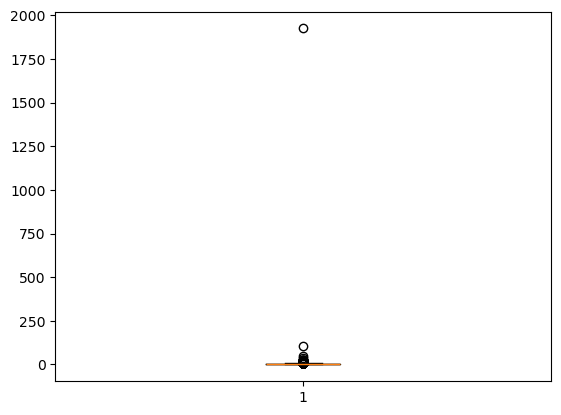

In [75]:
# There are at least 2 outliers
plt.boxplot(avioset.crew_on_board)
plt.show()

In [76]:
# Calculate mean values
def calculate_mean(df, col):
    return df[col].mean()

print(calculate_mean(avioset, 'crew_on_board'))

3.0524026657313224


Mean value is ~ 3.05. That's why let's take a closer look to values 1924, 107, 48, 37, 25, 23, 22, 20, 19, 18

In [77]:
# Let's see which aircraft can have 1924 crew
avioset.loc[(avioset['crew_on_board'] == 1924.00), ['crew_on_board', 'aircraft', 'pax_on_board']]


,crew_on_board,aircraft,pax_on_board
1947,1924.0,Focke-Wulf A.16,0.0


In Wiki we found this:

*"The Focke-Wulf A.16 was a German three/four passenger light transport monoplane designed by Heinrich Focke and Georg Wulf and was the first design built by the newly formed Focke-Wulf company."*

This means we have to delete this row.

In [78]:
# Let's see which aircraft can have 107 crew
avioset.loc[(avioset['crew_on_board'] == 107.00), ['crew_on_board', 'aircraft', 'pax_on_board']]


,crew_on_board,aircraft,pax_on_board
15396,107.0,Antonov AN-10,7.0


On Google we found:
*The АN-10 is the first domestic passenger turboprop airplane for transportation of 100 passengers*

This means we have to delete this row.

In [79]:
# Let's see which aircraft can have 48 crew
avioset.loc[(avioset['crew_on_board'] == 48.00), ['crew_on_board', 'aircraft', 'pax_on_board']]


,crew_on_board,aircraft,pax_on_board
13319,48.0,Vickers Viscount,5.0


In Wiki we found this:

*The Vickers Viscount is a British medium-range turboprop airliner first flown in 1948 by Vickers-Armstrongs. A design requirement from the Brabazon Committee, it entered service in 1953 and was the first turboprop-powered airliner.
Crew: 2 pilots + cabin crew
Capacity: 75 passengers"*

This means we have to delete this row too.

In [80]:
# Let's see which aircraft can have 37 crew
avioset.loc[(avioset['crew_on_board'] == 37.00), ['crew_on_board', 'aircraft', 'pax_on_board']]

,crew_on_board,aircraft,pax_on_board
26130,37.0,Canadair RegionalJet CRJ-100,3.0


In Wiki we found this:

*"The Bombardier CRJ/Mitsubishi CRJ or CRJ Series (for Canadair Regional Jet) is a family of regional jets introduced in 1991 by Bombardier Aerospace.
...CRJ100 – maximum of 50 passenger seats.*

37 crew members for 3 passengers on board is too much.
This means we have to delete this row too.

In [81]:
# Let's see which aircraft can have 25 crew
avioset.loc[(avioset['crew_on_board'] == 25.00), ['crew_on_board', 'aircraft', 'pax_on_board']]

,crew_on_board,aircraft,pax_on_board
17459,25.0,Douglas DC-8,48.0


In Wiki we found this:

"The Douglas DC-8 (sometimes McDonnell Douglas DC-8) is an early long-range narrow-body jetliner designed and produced by the American Douglas Aircraft Company. Work began in 1952 towards the United States Air Force's (USAF) requirement for a jet-powered aerial refueling tanker.
Cockpit crew: 3. Passengers 177.
* 

25 crew members for 48 passengers on board is too much.
This means we have to delete this row too.

In [82]:
# Let's see which aircraft can have 23 crew
avioset.loc[(avioset['crew_on_board'] == 23.00), ['crew_on_board', 'aircraft', 'pax_on_board']]

,crew_on_board,aircraft,pax_on_board
10609,23.0,Convair B-36 Peacemaker,0.0
17911,23.0,Boeing 747-200,190.0
19908,23.0,Boeing 747-200,246.0
23752,23.0,Boeing 747-100,289.0


In [83]:
# Let's see which aircraft can have 22 crew
avioset.loc[(avioset['crew_on_board'] == 22.00), ['crew_on_board', 'aircraft', 'pax_on_board']]

,crew_on_board,aircraft,pax_on_board
10462,22.0,Convair B-36 Peacemaker,0.0
20415,22.0,Boeing 747-200,307.0
20671,22.0,Lockheed L-1011 TriStar,128.0
22919,22.0,Boeing 747-400,274.0
26748,22.0,Boeing 747-300,0.0


*"The Boeing 747-200 is a four-engined long-range widebody airliner with a capacity of maximum 480 passengers"*

So we'll stop here.

In [84]:
# Check - Shape before filter
print(f"Shape before {avioset.shape}")

# Let's take only rows for crew_on_board which are less than 25.
avioset = avioset[(avioset['crew_on_board'] < 25)]

# Check - Shape before filter
print(f"Shape after {avioset.shape}")

Shape before (28510, 19)
Shape after (28505, 19)


<div style="background-color: #9df9ef; padding: 10px;"></div>

##### Column 'crew_fatalities' 

In [85]:
# Print unique value counts in a column 'crew_fatalities'
def print_value_counts_by_index(df, col):
    value_counts = df[col].value_counts(dropna=False)
    print(value_counts.sort_index(ascending=False))

print_value_counts_by_index(avioset, 'crew_fatalities')

crew_fatalities
23.0        3
22.0        1
21.0        3
20.0        1
19.0        6
18.0        3
17.0        8
16.0       11
15.0       14
14.0       37
13.0       40
12.0       99
11.0      116
10.0      208
9.0       263
8.0       385
7.0       553
6.0       753
5.0      1135
4.0      1657
3.0      1975
2.0      3494
1.0      5020
0.0     12719
NaN         1
Name: count, dtype: int64


##### There is only 1 nan value. We'll delete this row.

In [86]:
# Check
print(f"Shape before {avioset.shape}")

# Delete
avioset = del_nan_in_col(avioset, 'crew_fatalities')

# Check
print(f"Shape after {avioset.shape}")

Shape before (28505, 19)
Shape after (28504, 19)


<div style="background-color: #9df9ef; padding: 10px;"></div>

##### Column 'total_fatalities' 

In [87]:
# Print unique value counts in a column 'total_fatalities'
def print_value_counts_by_index(df, col):
    value_counts = df[col].value_counts(dropna=False)
    print(value_counts.sort_index(ascending=False))

print_value_counts_by_index(avioset, 'total_fatalities')

total_fatalities
520        1
346        1
335        1
329        1
312        1
       ...  
4       1631
3       1881
2       2716
1       2956
0      11824
Name: count, Length: 201, dtype: int64


In [88]:
avioset['total_fatalities'].isna().sum()

0

##### No nan values. The column remain as is.

<div style="background-color: #9df9ef; padding: 10px;"></div>

##### Column 'other_fatalities' 

In [89]:
# Print unique value counts in a column 'other_fatalities'
def print_value_counts_by_index(df, col):
    value_counts = df[col].value_counts(dropna=False)
    print(value_counts.sort_index(ascending=False))

print_value_counts_by_index(avioset, 'other_fatalities')

other_fatalities
297.0        1
180.0        1
110.0        1
107.0        1
78.0         1
71.0         1
58.0         1
54.0         1
49.0         3
45.0         2
44.0         1
43.0         1
38.0         1
37.0         1
36.0         1
35.0         1
33.0         1
30.0         1
28.0         1
27.0         1
25.0         1
24.0         2
23.0         3
22.0         2
20.0         1
19.0         1
18.0         1
17.0         1
16.0         1
15.0         2
14.0         3
13.0         6
12.0         4
11.0         6
10.0        10
9.0          4
8.0         10
7.0         14
6.0         18
5.0         18
4.0         28
3.0         51
2.0         60
1.0        151
0.0      28073
NaN         10
Name: count, dtype: int64


##### There are 10 nan out of 28504 ~ 0,04%. We'll drop them.

In [90]:
# Check
print(f"Shape before {avioset.shape}")

# Delete
avioset = del_nan_in_col(avioset, 'other_fatalities')

# Check
print(f"Shape after {avioset.shape}")

Shape before (28504, 19)
Shape after (28494, 19)


<div style="background-color: #9df9ef; padding: 10px;"></div>

##### Column 'pax_fatalities' 

In [91]:
# Print unique value counts in a column 'pax_fatalities'
def print_value_counts_by_index(df, col):
    value_counts = df[col].value_counts(dropna=False)
    print(value_counts.sort_index(ascending=False))

print_value_counts_by_index(avioset, 'pax_fatalities')

pax_fatalities
506.0        1
334.0        1
326.0        1
307.0        1
289.0        1
         ...  
4.0        632
3.0        748
2.0       1041
1.0       1657
0.0      20539
Name: count, Length: 187, dtype: int64


In [92]:
avioset['pax_fatalities'].isna().sum()

0

##### No nan values. The column remain as is.

<div style="background-color: #9df9ef; padding: 10px;"></div>

##### Column 'pax_on_board' 

In [93]:
# Print unique value counts in a column 'pax_on_board'
def print_value_counts_by_index(df, col):
    value_counts = df[col].value_counts(dropna=False)
    print(value_counts.sort_index(ascending=False))

print_value_counts_by_index(avioset, 'pax_on_board')

pax_on_board
509.0        1
451.0        1
384.0        1
381.0        1
380.0        1
         ...  
3.0       1063
2.0       1484
1.0       1966
0.0      16005
NaN         31
Name: count, Length: 255, dtype: int64


In [94]:
avioset['pax_on_board'].isna().sum()

31

##### There are 31 nan out of 28494 ~ 0,11%. We'll drop them.

In [95]:
# Check
print(f"Shape before {avioset.shape}")

# Delete
avioset = del_nan_in_col(avioset, 'pax_on_board')

# Check
print(f"Shape after {avioset.shape}")

Shape before (28494, 19)
Shape after (28463, 19)


<div style="background-color: #9df9ef; padding: 10px;"></div>

##### Our avioset is clean, without any NAN values so let's visualize.

In [96]:
avioset.isna().sum()

aircraft            0
operator            0
flight_phase        0
flight_type         0
survivors           0
crash_site          0
crash_location      0
country             0
region              0
crew_on_board       0
crew_fatalities     0
pax_on_board        0
pax_fatalities      0
other_fatalities    0
total_fatalities    0
crash_cause         0
year                0
month               0
day                 0
dtype: int64

In [97]:
avioset.columns

Index(['aircraft', 'operator', 'flight_phase', 'flight_type', 'survivors',
       'crash_site', 'crash_location', 'country', 'region', 'crew_on_board',
       'crew_fatalities', 'pax_on_board', 'pax_fatalities', 'other_fatalities',
       'total_fatalities', 'crash_cause', 'year', 'month', 'day'],
      dtype='object')

[Return to Table of Contents](#toc)

<div style="background-color: #9df9ef; padding: 10px;"></div>

## III. Analyzes, visualizations <a id="visualizations"></a> 

### 3.1. Years with the most accidents <a id="3-1">

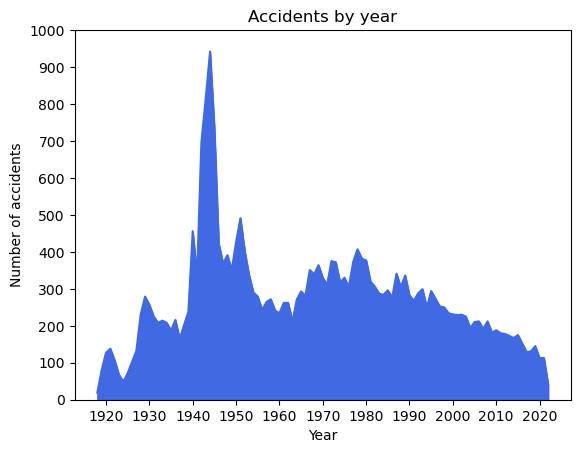

In [98]:
avioset.groupby('year').size().plot.area(color=['royalblue'])

plt.xticks([1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
plt.yticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])

plt.title("Accidents by year")
plt.xlabel('Year')
plt.ylabel('Number of accidents')
# plt.grid(True)
plt.show()

##### So which year has the most accidents?

In [99]:
# It's 1944 - The Second World War with 942 accidents
print(avioset.groupby('year').size().sort_values(ascending=False))

year
1944    942
1943    815
1945    736
1942    696
1951    491
       ... 
1925     72
1923     67
1924     49
2022     39
1918     19
Length: 105, dtype: int64


[Return to Table of Contents](#toc)

<div style="background-color: #9df9ef; padding: 10px;"></div>

### 3.2. Ten countries with the most accidents <a id="3-2">

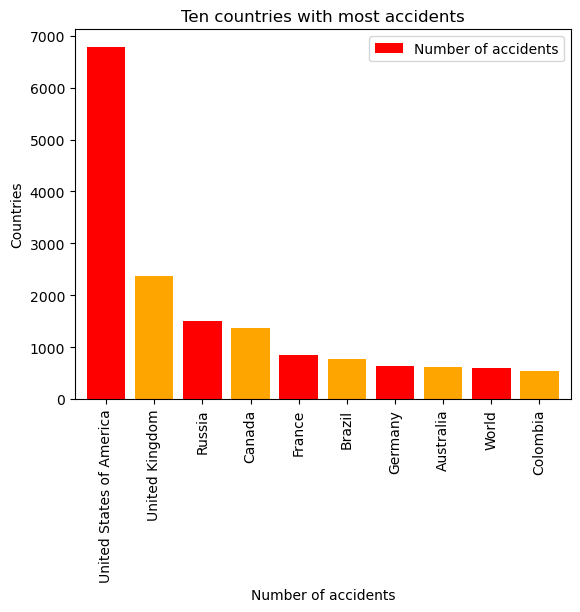

In [100]:
country_max = avioset.groupby('country').size().sort_values(ascending=False)

# Create a vertical bar chart with customizations
ax = country_max[:10].plot.bar(width=0.8, color=['red', 'orange'])

# Customize the plot
ax.set_xlabel('Number of accidents')
ax.set_ylabel('Countries')
ax.set_title('Ten countries with most accidents')
ax.legend(['Number of accidents', 'country_max[:10]'])

# Show the plot
plt.show()

[Return to Table of Contents](#toc)

<div style="background-color: #9df9ef; padding: 10px;"></div>

#### 3.3. Regions with the most accidents <a id="3-3">

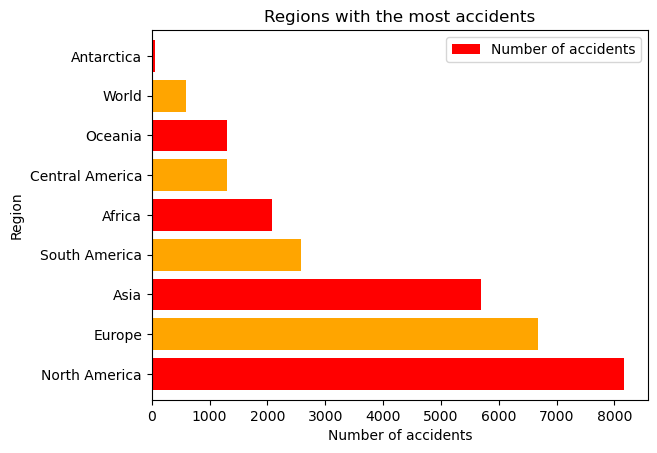

In [101]:
regions_max = avioset.groupby('region').size().sort_values(ascending=False)

# Create a vertical bar chart with customizations
ax = regions_max.plot.barh(width=0.8, color=['red', 'orange'])

# Customize the plot
ax.set_xlabel('Number of accidents')
ax.set_ylabel('Region')
ax.set_title('Regions with the most accidents')
ax.legend(['Number of accidents', 'country_max[:10]'])

# Show the plot
plt.show()

[Return to Table of Contents](#toc)

<div style="background-color: #9df9ef; padding: 10px;"></div>

#### 3.4. Ten most dangerous aircrafts <a id="3-4">

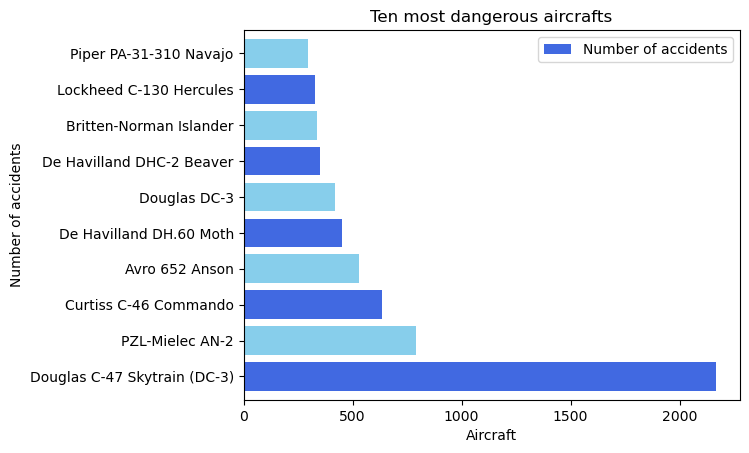

In [102]:
aircrafts_max = avioset.groupby('aircraft').size().sort_values(ascending=False)

# Create a vertical bar chart with customizations
ax = aircrafts_max[:10].plot.barh(width=0.8, color=['royalblue', 'skyblue'])

# Customize the plot
ax.set_xlabel('Aircraft')
ax.set_ylabel('Number of accidents')
ax.set_title('Ten most dangerous aircrafts')
ax.legend(['Number of accidents', 'aircrafts_max[:10]'])

# Show the plot
plt.show()

##### From Wiki: The Douglas C-47 Skytrain or Dakota (RAF designation) is a military transport aircraft developed from the civilian Douglas DC-3 airliner. It was used extensively by the Allies during World War II.

[Return to Table of Contents](#toc)

<div style="background-color: #9df9ef; padding: 10px;"></div>

#### 3.5. Ten operators with most accidents<a id="3-5">

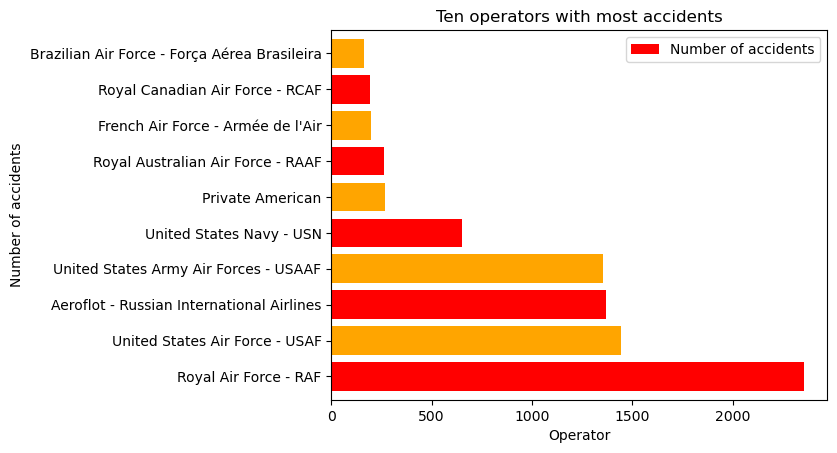

In [103]:
operators_max = avioset.groupby('operator').size().sort_values(ascending=False)

# Create a vertical bar chart with customizations
ax = operators_max[:10].plot.barh(width=0.8, color=['red', 'orange'])

# Customize the plot
ax.set_xlabel('Operator')
ax.set_ylabel('Number of accidents')
ax.set_title('Ten operators with most accidents')
ax.legend(['Number of accidents', 'aircrafts_max[:10]'])

# Show the plot
plt.show()

[Return to Table of Contents](#toc)

<div style="background-color: #9df9ef; padding: 10px;"></div>

#### 3.6. Most dangerous flight phases<a id="3-6">

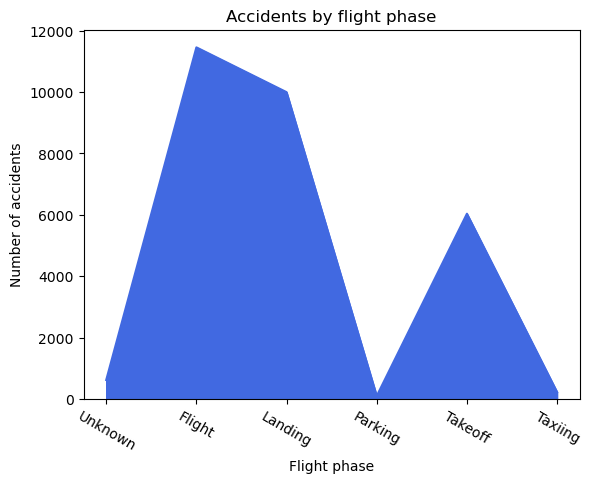

In [104]:
avioset.groupby('flight_phase').size().plot.area(color=['royalblue'])

plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Unknown', 'Flight', 'Landing', 'Parking', 'Takeoff', 'Taxiing'], rotation=-30)

plt.title("Accidents by flight phase")
plt.xlabel('Flight phase')
plt.ylabel('Number of accidents')
plt.show()

#### Conclusion: Most dangerous flight phases are Flight, Landing and Takeoff. They need most concentration.

[Return to Table of Contents](#toc)

<div style="background-color: #9df9ef; padding: 10px;"></div>

#### 3.7. Most common crash cause <a id="3-7">

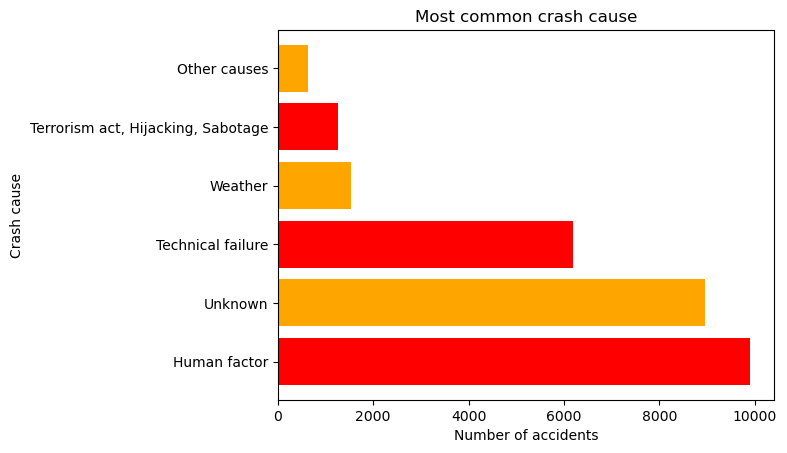

In [105]:
crash_causes_max = avioset.groupby('crash_cause').size().sort_values(ascending=False)

# Create a vertical bar chart with customizations
ax = crash_causes_max.plot.barh(width=0.8, color=['red', 'orange'])

# Customize the plot
ax.set_xlabel('Number of accidents')
ax.set_ylabel('Crash cause')
ax.set_title('Most common crash cause')
# ax.legend(['Number of accidents'])

# Show the plot
plt.show()

[Return to Table of Contents](#toc)

<div style="background-color: #9df9ef; padding: 10px;"></div>

#### 3.8. Correlation between year, passengers, crew, fatalities <a id="3-8">

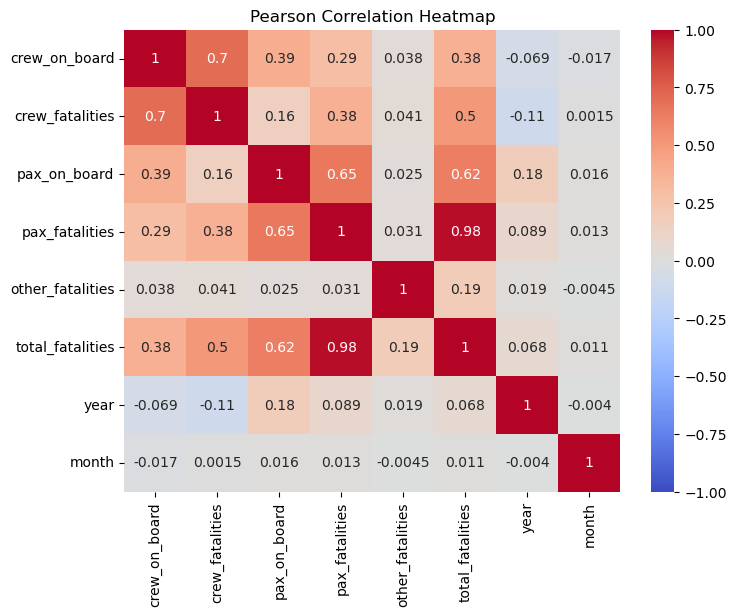

In [106]:
avioset_selected = avioset[['crew_on_board', 'crew_fatalities', 'pax_on_board', 'pax_fatalities', 'other_fatalities', 'total_fatalities', 'year', 'month']]

correlation_matrix = avioset_selected.corr(method='pearson')

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Heatmap')
plt.show()

##### Analysis of different correlations shows that passenger fatalities are most total fatalities.
##### With the years crew on board becomes slightly less.

[Return to Table of Contents](#toc)

<div style="background-color: #9df9ef; padding: 10px;"></div>

#### 3.9. Relationship between year, flight phase, total fatalities <a id="3-9">

In [107]:
grouped_data = avioset.groupby(['year', 'flight_phase'])['total_fatalities'].sum().reset_index()

print(grouped_data)

     year                   flight_phase  total_fatalities
0    1918                                                0
1    1918                         Flight                18
2    1918  Landing (descent or approach)                 3
3    1918                Takeoff (climb)                 8
4    1919                                                0
..    ...                            ...               ...
530  2021                Takeoff (climb)               155
531  2022                         Flight               199
532  2022  Landing (descent or approach)                 5
533  2022                        Parking                 0
534  2022                Takeoff (climb)                20

[535 rows x 3 columns]


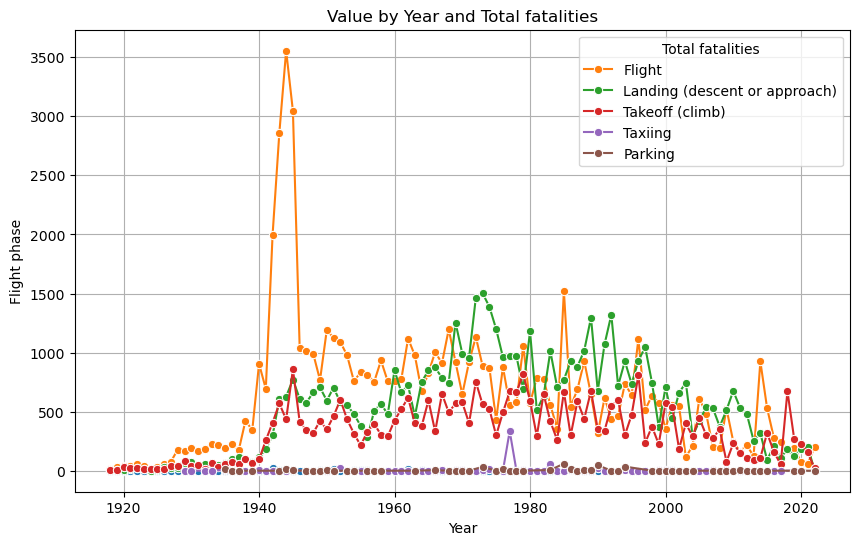

In [108]:
# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='total_fatalities', hue='flight_phase', marker='o')

# Customize the plot
plt.title('Value by Year and Total fatalities')
plt.xlabel('Year')
plt.ylabel('Flight phase')
plt.legend(title='Total fatalities')
plt.grid(True)
plt.show()

###### Conclusion: The trend is - over the years the crew becomes more and more trained.

[Return to Table of Contents](#toc)

<div style="background-color: #9df9ef; padding: 10px;"></div>

#### 3.10. Relationship between year, survivors, total fatalities <a id="3-10">

In [109]:
grouped_data_1 = avioset.groupby(['year', 'survivors'])['total_fatalities'].sum().reset_index()

print(grouped_data_1)

     year survivors  total_fatalities
0    1918                           0
1    1918        No                21
2    1918       Yes                 8
3    1919                           0
4    1919        No                40
..    ...       ...               ...
289  2020       Yes               165
290  2021        No               296
291  2021       Yes               118
292  2022        No               211
293  2022       Yes                13

[294 rows x 3 columns]


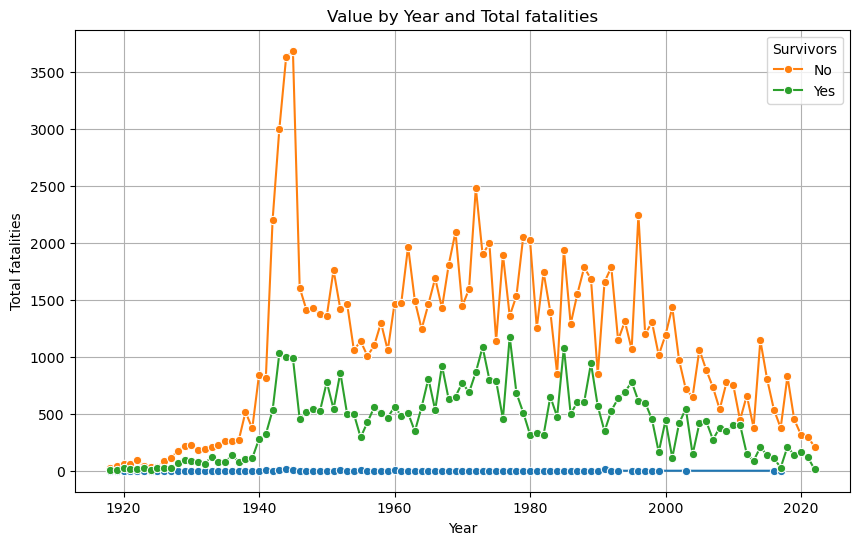

In [110]:
# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data_1, x='year', y='total_fatalities', hue='survivors', marker='o')

# Customize the plot
plt.title('Value by Year and Total fatalities')
plt.xlabel('Year')
plt.ylabel('Total fatalities')
plt.legend(title='Survivors')
plt.grid(True)
plt.show()

##### Conclusion: The trend is - over the years there are more survivors

[Return to Table of Contents](#toc)

<div style="background-color: #9df9ef; padding: 10px;"></div>

#### 3.11. Relationship between year, crash site, total fatalities <a id="3-11">

In [111]:
grouped_data_1 = avioset.groupby(['year', 'crash_site'])['total_fatalities'].sum().reset_index()

print(grouped_data_1)

     year                              crash_site  total_fatalities
0    1918  Airport (less than 10 km from airport)                16
1    1918                 Lake, Sea, Ocean, River                 4
2    1918                               Mountains                 1
3    1918                           Plain, Valley                 8
4    1919  Airport (less than 10 km from airport)                34
..    ...                                     ...               ...
665  2022                                    City                12
666  2022                                  Desert                 0
667  2022                 Lake, Sea, Ocean, River                23
668  2022                               Mountains               155
669  2022                           Plain, Valley                23

[670 rows x 3 columns]


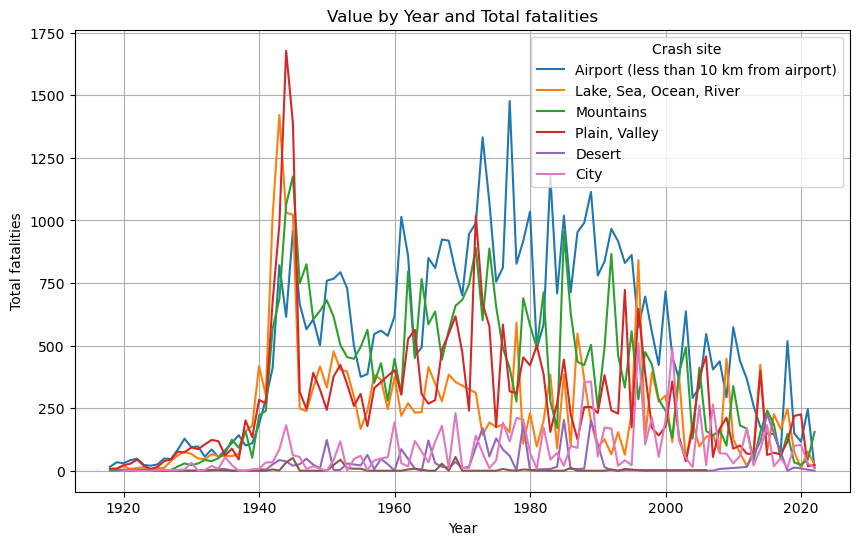

In [112]:
# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data_1, x='year', y='total_fatalities', hue='crash_site')

# Customize the plot
plt.title('Value by Year and Total fatalities')
plt.xlabel('Year')
plt.ylabel('Total fatalities')
plt.legend(title='Crash site')
plt.grid(True)
plt.show()

##### Conclusion: It is interesting to see that most of the incidents occur near an airport and in the mountains.

[Return to Table of Contents](#toc)